In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from logistic.logistic import LogisticRegression

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,A,B,C,D,Class
0,-1.202659,0.324662,0.741053,-1.583113,1
1,-3.671058,-1.291171,-1.638048,-1.272242,0
2,-0.785138,4.033208,0.621245,-4.928067,1
3,1.196428,0.991209,0.633605,-0.075649,1
4,1.195653,3.383962,-1.419071,-2.386325,0


<AxesSubplot:xlabel='A', ylabel='Density'>

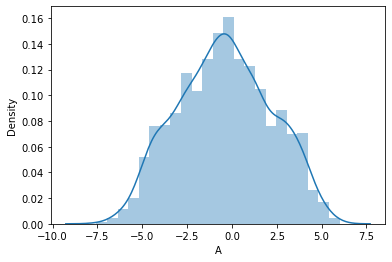

In [4]:
sns.distplot(data['A'])

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
scaled_data = pd.DataFrame(x_scaled)

In [6]:
scaled_data.head()

,0,1,2,3,4
0,0.468726,0.294127,0.573760,0.569715,1.0
1,0.286714,0.150801,0.375942,0.601126,0.0
2,0.499512,0.623079,0.563799,0.231730,1.0
3,0.645626,0.353250,0.564826,0.722034,1.0
4,0.645569,0.565490,0.394149,0.488556,0.0


<AxesSubplot:xlabel='1', ylabel='Density'>

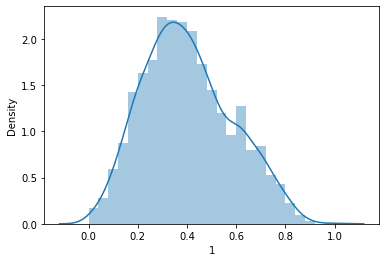

In [7]:
sns.distplot(scaled_data[1])

<AxesSubplot:xlabel='4', ylabel='Density'>

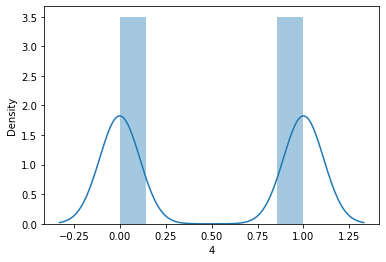

In [8]:
sns.distplot(scaled_data[4])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data[[0,1,2,3]], scaled_data[4],test_size=0.2)

In [10]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1600, 4), (400, 4), (1600,), (400,))

In [11]:
logit = LogisticRegression(4,regularization = 'L1', learningRate = 0.001,lambda_ = 10)

In [12]:
logit.SGD(X_train.to_numpy(),y_train.to_numpy().reshape(-1,1),450001 , printFreq = 50000)

(1600, 4) (1600, 1)
Logistic Loss for epoch 0 is 0.693147
Logistic Loss for epoch 50000 is 17.200565
Logistic Loss for epoch 100000 is 19.401743
Logistic Loss for epoch 150000 is 15.269772
Logistic Loss for epoch 200000 is 7.763578
Logistic Loss for epoch 250000 is -1.628401
Logistic Loss for epoch 300000 is -12.083243
Logistic Loss for epoch 350000 is -23.125404
Logistic Loss for epoch 400000 is -34.477777
Logistic Loss for epoch 450000 is -45.982558


In [13]:
y_pred = logit.predict(X_test.to_numpy())  

<AxesSubplot:ylabel='Density'>

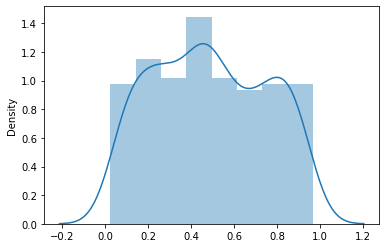

In [14]:
sns.distplot(y_pred)

In [15]:
preds = []
for i in y_pred:
    if i > 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [16]:
from sklearn.metrics import f1_score, roc_auc_score
roc_auc_score(preds,y_test)

0.7460933561850993

In [17]:
X = scaled_data[[0,1,2,3]].to_numpy()
Y = scaled_data[4].to_numpy()

In [18]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
iters = 0
f1_scores = []
auc_scores = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    logit = LogisticRegression(4,regularization = 'L1', learningRate = 0.001,lambda_ = 10)
    print("split %d"%iters)
    logit.SGD(X_train ,y_train.reshape(-1,1),450001 , printFreq = 50000)
    y_pred = logit.predict(X_test) 
    preds = []
    for i in y_pred:
        if i > 0.5:
            preds.append(1)
        else:
            preds.append(0) 
    iters+=1
    f1_scores.append(f1_score(preds,y_test))
    auc_scores.append(roc_auc_score(preds,y_test))

TRAIN: 1600 TEST: 400
split 0
(1600, 4) (1600, 1)
Logistic Loss for epoch 0 is 0.693147
Logistic Loss for epoch 50000 is 16.503087
Logistic Loss for epoch 100000 is 18.619915
Logistic Loss for epoch 150000 is 14.430854
Logistic Loss for epoch 200000 is 6.847221
Logistic Loss for epoch 250000 is -2.667840
Logistic Loss for epoch 300000 is -13.300977
Logistic Loss for epoch 350000 is -24.577410
Logistic Loss for epoch 400000 is -36.216300
Logistic Loss for epoch 450000 is -48.054251
TRAIN: 1600 TEST: 400
split 1
(1600, 4) (1600, 1)
Logistic Loss for epoch 0 is 0.693147
Logistic Loss for epoch 50000 is 16.975080
Logistic Loss for epoch 100000 is 19.376943
Logistic Loss for epoch 150000 is 15.429531
Logistic Loss for epoch 200000 is 8.095514
Logistic Loss for epoch 250000 is -1.142774
Logistic Loss for epoch 300000 is -11.466394
Logistic Loss for epoch 350000 is -22.401369
Logistic Loss for epoch 400000 is -33.670593
Logistic Loss for epoch 450000 is -45.115445
TRAIN: 1600 TEST: 400
split 

In [19]:
print("5 fold cross valudated F1 score%f"%np.mean(f1_scores))
print("5 fold cross valudated AUC %f"%np.mean(auc_scores))

5 fold cross valudated F1 score0.726909
5 fold cross valudated AUC 0.734510


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , preds)

array([[165,  47],
       [ 52, 136]])